In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [31]:
file_path = './Water_pond_tanks_2021.csv'
file_path = './Indian_water_data_2014.csv'
data=pd.read_csv(file_path,encoding='cp1252')

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Temp                              1991 non-null   object
 1   D.O. (mg/l)                       1991 non-null   object
 2   PH                                1991 non-null   object
 3   CONDUCTIVITY (µmhos/cm)           1991 non-null   object
 4   B.O.D. (mg/l)                     1991 non-null   object
 5   NITRATENAN N+ NITRITENANN (mg/l)  1991 non-null   object
 6   FECAL COLIFORM (MPN/100ml)        1991 non-null   object
 7   TOTAL COLIFORM (MPN/100ml)Mean    1991 non-null   object
dtypes: object(8)
memory usage: 124.6+ KB


In [34]:
'''
data=data.replace('-', np.nan)
data=data.replace('\n4', '',regex=True)
data.iloc[:,0:8]=data.iloc[:,0:8].astype(float)
data['Total Coliform (MPN/100ml) (Max)']=data['Total Coliform (MPN/100ml) (Min)'].astype(float)
'''
#conversions
data['Temp']=pd.to_numeric(data['Temp'],errors='coerce')
data['D.O. (mg/l)']=pd.to_numeric(data['D.O. (mg/l)'],errors='coerce')
data['PH']=pd.to_numeric(data['PH'],errors='coerce')
data['B.O.D. (mg/l)']=pd.to_numeric(data['B.O.D. (mg/l)'],errors='coerce')
data['CONDUCTIVITY (µmhos/cm)']=pd.to_numeric(data['CONDUCTIVITY (µmhos/cm)'],errors='coerce')
data['NITRATENAN N+ NITRITENANN (mg/l)']=pd.to_numeric(data['NITRATENAN N+ NITRITENANN (mg/l)'],errors='coerce')
data['FECAL COLIFORM (MPN/100ml)']=pd.to_numeric(data['FECAL COLIFORM (MPN/100ml)'],errors='coerce')
data['TOTAL COLIFORM (MPN/100ml)Mean']=pd.to_numeric(data['TOTAL COLIFORM (MPN/100ml)Mean'],errors='coerce')
data.dtypes


Temp                                float64
D.O. (mg/l)                         float64
PH                                  float64
CONDUCTIVITY (µmhos/cm)             float64
B.O.D. (mg/l)                       float64
NITRATENAN N+ NITRITENANN (mg/l)    float64
FECAL COLIFORM (MPN/100ml)          float64
TOTAL COLIFORM (MPN/100ml)Mean      float64
dtype: object

<Axes: >

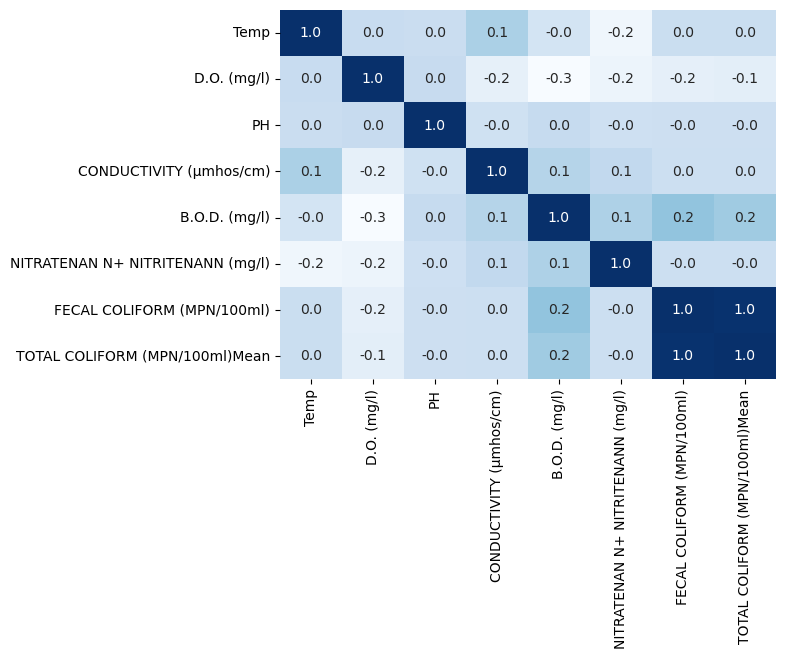

In [36]:
sns.heatmap(data.corr(),annot=True, cbar=False, cmap='Blues', fmt='.1f')

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1991 entries, 0 to 1990
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Temp                              1899 non-null   float64
 1   D.O. (mg/l)                       1960 non-null   float64
 2   PH                                1983 non-null   float64
 3   CONDUCTIVITY (µmhos/cm)           1966 non-null   float64
 4   B.O.D. (mg/l)                     1948 non-null   float64
 5   NITRATENAN N+ NITRITENANN (mg/l)  1766 non-null   float64
 6   FECAL COLIFORM (MPN/100ml)        1675 non-null   float64
 7   TOTAL COLIFORM (MPN/100ml)Mean    1859 non-null   float64
dtypes: float64(8)
memory usage: 124.6 KB


In [21]:
name = ['Temperature', 'Dissolved Oxygen', 'pH', 'Conductivity', 'BOD',  'Fecal Coliform', 'Total Coliform']
reduced_data = pd.DataFrame()
for i in range(0, 14, 2):
    col_avg = data.iloc[:, i:i+2].mean(axis=1)
    reduced_data[name[i//2]] = col_avg

print(f"列平均值后的数据大小: {reduced_data.shape}")

列平均值后的数据大小: (620, 7)


In [22]:
reduced_data.head()

,Temperature,Dissolved Oxygen,pH,Conductivity,BOD,Fecal Coliform,Total Coliform
0,25.5,4.85,7.50,2702.5,2.40,15.0,120.0
1,27.5,4.90,7.35,889.0,3.25,19.0,150.0
2,21.0,5.10,7.70,42450.0,2.60,3.0,47.0
3,25.5,5.80,7.10,328.0,1.75,194.5,170.0
4,25.5,5.95,7.65,615.0,1.65,166.0,240.0


<Axes: >

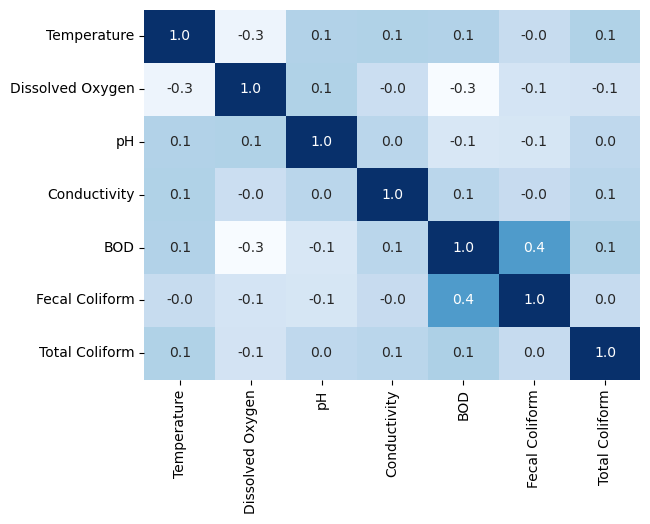

In [23]:
sns.heatmap(reduced_data.corr(),annot=True, cbar=False, cmap='Blues', fmt='.1f')